In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Generate data

In [4]:
sample_size = 1000
x_min = 0
x_max = 100

x = np.random.randint(low=x_min, high=x_max, size=sample_size, dtype=int)
y = x + 20*np.random.randn(sample_size)

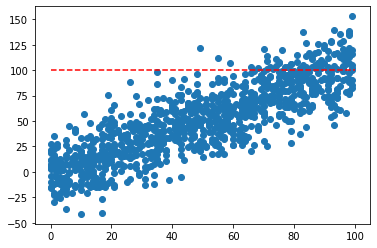

In [5]:
plt.scatter(x,y);
plt.hlines(y=x_max, xmin=x_min, xmax=x_max, colors='red', linestyles='dashed');

In [6]:
y = np.where(y<x_max, 0, 1)

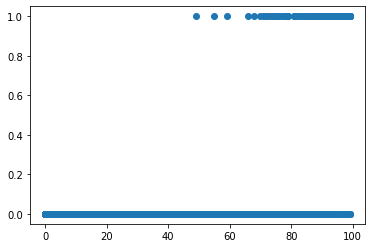

In [7]:
plt.scatter(x,y);

In [8]:
df = pd.DataFrame({"Age": x, "Action": y})

#### Explore data

In [9]:
df.head()

,Age,Action
0,51,0
1,64,0
2,56,0
3,21,0
4,26,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     1000 non-null   int64
 1   Action  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


In [11]:
# check imbalance
df['Action'].value_counts()

0    914
1     86
Name: Action, dtype: int64

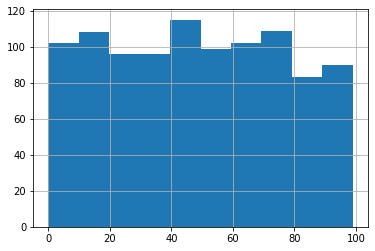

In [12]:
df['Age'].hist();

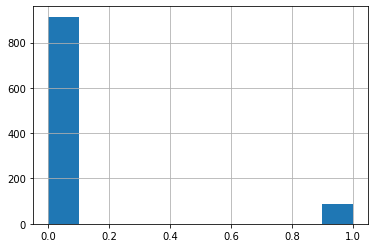

In [13]:
df['Action'].hist();

#### Split train and test datasets

In [14]:
from sklearn.model_selection import  train_test_split


In [40]:
X = df['Age'].to_numpy().reshape(-1,1)
y = df['Action'].to_numpy()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Train classification model

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

#### Test classification model

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [20]:
y_pred = clf.predict(X_test)

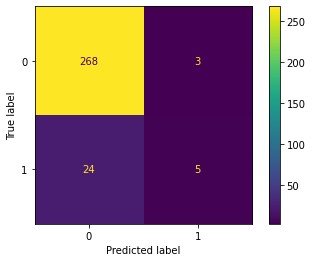

In [21]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

#### Model evaluation

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.91


#### Comparison with dummy classifier

The ZeroR (or Zero Rate) Classifier always classifies to the largest class– in other words, just trivially predicting the most-frequent class. For a two outcome model, it will be right more often than not by just going with the odds.

In [24]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

y_pred_dummy = dummy_clf.predict(X_test)

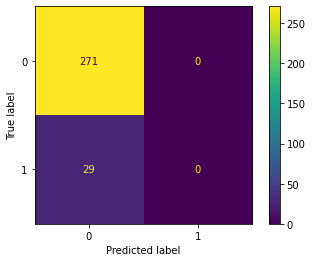

In [25]:
cm = confusion_matrix(y_test, y_pred_dummy)
ConfusionMatrixDisplay(cm).plot()

In [26]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_dummy)))

Accuracy: 0.90


#### Change Your Performance Metric

In [27]:
from sklearn.metrics import roc_auc_score

In [28]:
print('AUC_ROC: {:.2f}'.format(roc_auc_score(y_test, y_pred)))

AUC_ROC: 0.58


In [29]:
print('Dummy AUC_ROC: {:.2f}'.format(roc_auc_score(y_test, y_pred_dummy)))

Dummy AUC_ROC: 0.50


#### Up-sample Minority Class
Up-sampling is the process of randomly duplicating observations from the minority class in order to reinforce its signal.

There are several heuristics for doing so, but the most common way is to simply resample with replacement.

In [30]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.Action==0]
df_minority = df[df.Action==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

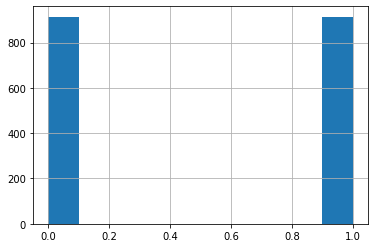

In [37]:
df_upsampled['Action'].hist()

In [32]:
# Display new class counts
df_upsampled.Action.value_counts()


X = df_upsampled['Age'].to_numpy().reshape(-1,1)
y = df_upsampled['Action'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Accuracy: 0.85


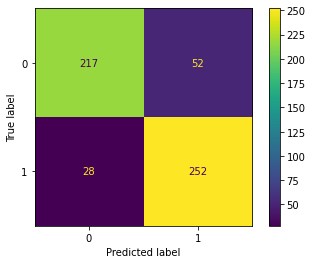

In [38]:
# train and test classifier on up-sampled data
clf1 = LogisticRegression()
clf1.fit(X_train, y_train)

y_pred = clf1.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.49


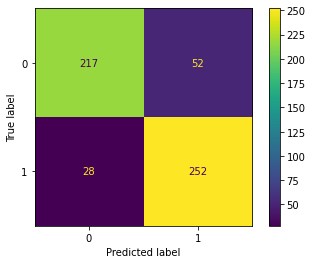

In [39]:
# train and test dummy classifier on up-sampled data
clf1 = DummyClassifier(strategy="most_frequent")
clf1.fit(X_train, y_train)

y_pred_dummy = clf1.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_dummy)))

#### Penalize Algorithms (Cost-Sensitive Training)

Accuracy: 0.81


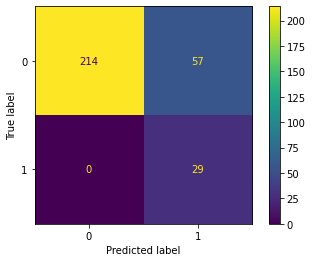

In [42]:
clf = LogisticRegression(class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

#### Use Tree-Based Algorithms
The final tactic we’ll consider is using tree-based algorithms. Decision trees often perform well on imbalanced datasets because their hierarchical structure allows them to learn signals from both classes.

Accuracy: 0.91


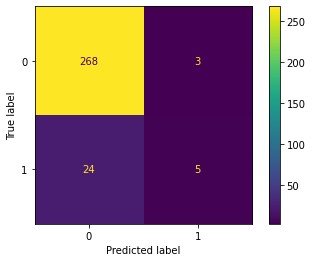

In [43]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()